## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 103s 1us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 61 steps, validate for 1 steps
Epoch 1/20
61/61 [==============================] - 229s 4s/step - loss: 2.2711 - accuracy: 0.8314 - val_loss: 8.8568 - val_accuracy: 0.2778
Epoch 2/20
61/61 [==============================] - 225s 4s/step - loss: 0.4802 - accuracy: 0.9534 - val_loss: 6.7942 - val_accuracy: 0.2778
Epoch 3/20
61/61 [==============================] - 231s 4s/step - loss: 0.5761 - accuracy: 0.9544 - val_loss: 9.6669 - val_accuracy: 0.2778
Epoch 4/20
61/61 [==============================] - 237s 4s/step - loss: 0.3706 - accuracy: 0.9687 - val_loss: 9.9959 - val_accuracy: 0.2778
Epoch 5/20
61/61 [==============================] - 233s 4s/step - loss: 0.8247 - accuracy: 0.9477 - val_loss: 11.1245 - val_accuracy: 0.2778
Epoch 6/20
61/61 [==============================] - 223s 4s/step - loss: 0.3208 - accuracy: 0.9769 - val_loss: 13.5722 - val_ac

In [25]:
import matplotlib.pyplot as plt

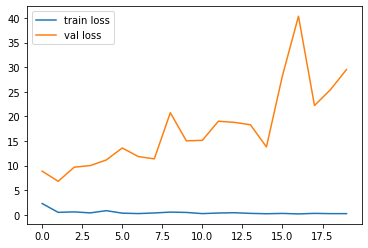

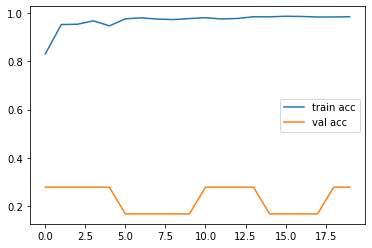

<Figure size 432x288 with 0 Axes>

In [26]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [28]:

y_pred = model.predict(test_set)


In [29]:
y_pred

array([[3.1103343e-07, 9.9999964e-01, 1.9288252e-27, 7.8644366e-15],
       [3.0030074e-09, 1.0000000e+00, 2.0044915e-27, 7.0011535e-16],
       [6.8512951e-09, 1.0000000e+00, 5.7837059e-27, 4.1051036e-16],
       [8.9668122e-09, 1.0000000e+00, 7.3500796e-26, 3.9071652e-15],
       [1.4505318e-09, 1.0000000e+00, 4.4419371e-27, 3.0190952e-16],
       [7.9178344e-09, 1.0000000e+00, 4.6235550e-27, 2.4549749e-16],
       [6.8699815e-09, 1.0000000e+00, 6.8700502e-27, 6.2825751e-15],
       [1.2235782e-07, 9.9999988e-01, 1.9345910e-24, 6.6747877e-13],
       [1.1730085e-09, 1.0000000e+00, 3.0164318e-26, 1.6828693e-15],
       [9.1083319e-09, 1.0000000e+00, 1.3274801e-24, 4.9722989e-14],
       [5.0111670e-09, 1.0000000e+00, 1.4203203e-25, 5.7179497e-15],
       [5.1680398e-09, 1.0000000e+00, 8.6840613e-27, 2.2910496e-15],
       [2.5661016e-09, 1.0000000e+00, 5.1141621e-26, 6.3309081e-15],
       [2.9688931e-09, 1.0000000e+00, 9.3310066e-27, 2.1047202e-15],
       [7.7004841e-10, 1.0000000e+

In [30]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [33]:
model=load_model('model_resnet50.h5')

In [34]:
img_data

NameError: name 'img_data' is not defined

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__